In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
ticker = "NVDA"  # US-listed NVIDIA
data = yf.download(ticker, period="3mo", interval="1d")

/var/folders/3n/c2cyvjmd52585bcd83mjw9dw0000gp/T/ipykernel_25160/1225871410.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="3mo", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [3]:
data["MA_22"] = data["Close"].rolling(window=22).mean()
print(data)


Price            Close        High         Low        Open     Volume  \
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA   
Date                                                                    
2025-05-05  113.812096  114.662035  112.652180  112.902163  133163200   
2025-05-06  113.532120  114.732033  110.812307  111.472265  158525600   
2025-05-07  117.051872  117.671832  112.272205  113.042156  206758800   
2025-05-08  117.361855  118.671761  115.841956  118.241791  198428100   
2025-05-09  116.641899  118.221791  115.201997  117.341847  132972200   
...                ...         ...         ...         ...        ...   
2025-07-29  175.509995  179.380005  175.020004  177.960007  154077500   
2025-07-30  179.270004  179.889999  176.039993  176.509995  174312200   
2025-07-31  177.869995  183.300003  175.929993  182.899994  221685400   
2025-08-01  173.720001  176.539993  170.889999  174.089996  204529000   
2025-08-04  180.000000  180.199997  174.520004  175

In [4]:

def get_sentiment(row):
    if pd.isna(row["MA_22"].iloc[0]):
        return None
    return "Bullish" if row["Close"].iloc[0] > row["MA_22"].iloc[0] else "Bearish"

data["Sentiment"] = data.apply(get_sentiment, axis=1)
latest_sentiment = data["Sentiment"].dropna().iloc[-1]
print(f"Latest market sentiment for {ticker}: {latest_sentiment}")




Latest market sentiment for NVDA: Bullish


In [5]:
print(data["MA_22"].dropna())

Date
2025-06-04    130.352767
2025-06-05    131.542230
2025-06-06    132.823050
2025-06-09    133.985242
2025-06-10    135.193795
2025-06-11    136.384163
2025-06-12    137.384551
2025-06-13    137.932234
2025-06-16    138.357662
2025-06-17    138.780360
2025-06-18    139.238969
2025-06-20    139.615761
2025-06-23    140.061185
2025-06-24    140.793419
2025-06-25    141.770201
2025-06-26    142.849252
2025-06-27    143.861044
2025-06-30    144.915106
2025-07-01    145.556908
2025-07-02    146.562789
2025-07-03    147.561404
2025-07-07    148.335487
2025-07-08    149.157753
2025-07-09    150.198649
2025-07-10    151.216370
2025-07-11    152.230001
2025-07-14    153.144547
2025-07-15    154.411364
2025-07-16    155.610001
2025-07-17    157.020455
2025-07-18    158.280455
2025-07-21    159.519547
2025-07-22    160.499092
2025-07-23    161.723183
2025-07-24    163.067274
2025-07-25    164.230911
2025-07-28    165.250911
2025-07-29    166.182274
2025-07-30    167.160456
2025-07-31    168.06

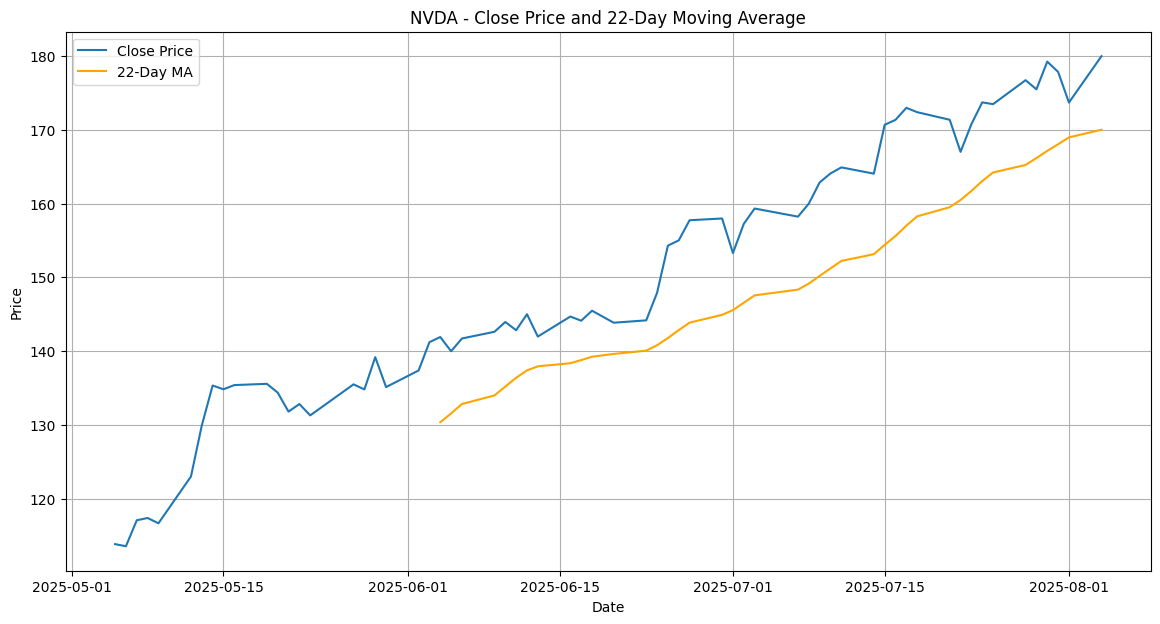

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data["Close"], label="Close Price")
plt.plot(data.index, data["MA_22"], label="22-Day MA", color="orange")
plt.title(f"{ticker} - Close Price and 22-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [70]:
print(data.columns)


MultiIndex([(    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA'),
            (    'MA_22',     ''),
            ('Sentiment',     '')],
           names=['Price', 'Ticker'])


In [87]:
data.to_csv("mafile.csv")